# Date-a-Scientist
### _ML Capstone Project_
***

An analysis of data from an online dating site, [OKCupid](https://www.okcupid.com/).

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

Get data

In [2]:
df = pd.read_csv('profiles.csv')
columns = df.columns
dtypes = df.dtypes

In [3]:
columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [4]:
# Let's make a PDF of columns and sample values.
# lines = []
# for column in columns:
#     newline = ''
#     newline = newline.join(column + '\n')
#     lines.append(newline)
#     for each in list(df[column])[:5]:
#         lines.append(str(each) + '\n')
#     lines.append('**********\n')
#     lines.append('\n')
# f = open('sample_answers.txt', 'w')
# f.writelines(lines)
# f.close()

In [5]:
ages = df['age'].values.tolist()
ages_unique = list(set(ages))
ages_counts = []
for age in ages_unique:
    ages_counts.append(ages.count(age))

X, y = np.array(ages_unique[:-2]), np.array(ages_counts[:-2])

In [6]:
smokes_df = df.smokes.value_counts()
vals = smokes_df.index.values.tolist()
vals[1:3] = ['some', 'w drink']
heights = smokes_df.tolist()

In [7]:
drinks_df = df.drinks.value_counts()
vals_dr = drinks_df.index.values.tolist()
heights_dr = drinks_df.tolist()
freq = [3,1,0,2,4,5]
vals_drp = [vals_dr[x] for x in freq]
vals_drp[0], vals_drp[4:6] = 'none', ['more', 'desperate']
heights_drp = [heights_dr[x] for x in freq]

In [8]:
smokes_df = df.smokes.value_counts()
vals = smokes_df.index.values.tolist()
vals[1:3] = ['some', 'w drink']
heights = smokes_df.tolist()

In [9]:
drugs_df = df.drugs.value_counts()
vals_dg = drugs_df.index.values.tolist()
heights_dg = drugs_df.tolist()

In [10]:
smokes_df = df.smokes.value_counts()
vals = smokes_df.index.values.tolist()
vals[1:3] = ['some', 'w drink']
heights = smokes_df.tolist()

Text(0.5, 0.98, 'Who is Using the Site?')

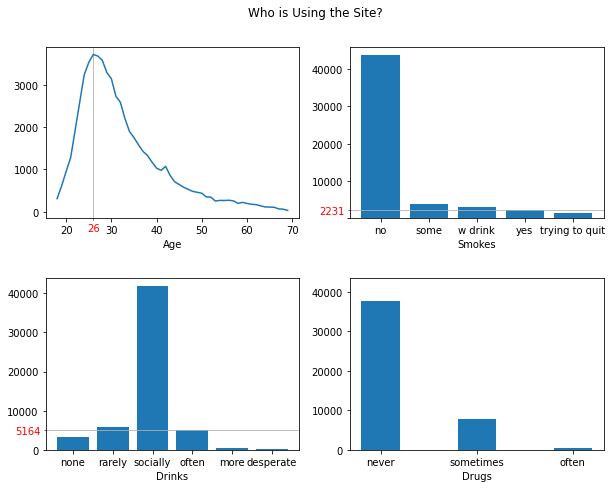

In [11]:
fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2, 2, figsize=(10, 7))
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

# age
ax11.plot(X, y)
minor_ticks11 = [X[y.argmax()]]
ax11.set_xticks(minor_ticks11, minor=True)
ax11.xaxis.set_minor_formatter(FormatStrFormatter("%d"))
ax11.xaxis.grid(True, which='minor')
ax11.get_xticklabels(minor=True)[0].set_color('red')
ax11.set_xlabel('Age')

# smoker status
ax12.bar(vals, heights)
yesses = [smokes_df['yes']]
ax12.yaxis.set_ticks([0, 10000, 20000, 30000, 40000])
ax12.set_yticklabels(['', 10000, 20000, 30000, 40000])
ax12.set_yticks(yesses, minor=True)
ax12.yaxis.set_minor_formatter(FormatStrFormatter("%d"))
ax12.yaxis.grid(True, which='minor')
ax12.get_yticklabels(minor=True)[0].set_color('red')
ax12.set_xlabel('Smokes')

# drink frequency
ax21.bar(vals_drp, heights_drp)
oftens = [drinks_df['often']]
ax21.set_yticks(oftens, minor=True)
ax21.yaxis.set_minor_formatter(FormatStrFormatter("%d"))
ax21.yaxis.grid(True, which='minor')
ax21.get_yticklabels(minor=True)[0].set_color('red')
ax21.set_xlabel('Drinks')

#drugs
ax22.bar(vals_dg, heights_dg, width=0.4)
ax22.set_ylim(0, 43500) 
ax22.set_xlabel('Drugs')

fig.suptitle('Who is Using the Site?')

In [12]:
df_income = df.income.value_counts()
incs = df_income.index.values.tolist()
inc_vals = df_income.tolist()
incs_dict = dict(zip(incs, inc_vals))
incsp = [x for x in sorted(incs_dict)]
inc_valsp = [incs_dict[x] for x in sorted(incs_dict)]
# print(incsp)
# print(inc_valsp)
incs_labels = []
for inc in incsp:
    x = str(inc)
    if (len(x) < 3): incs_labels.append('No Answer')
    elif ((len(x) >= 3) & (len(x) < 7)): incs_labels.append(x[:-3]+'K')
    elif (len(x) >= 7): incs_labels.append(x[:-6]+'M')

Text(0, 0.5, 'Yearly Income in Dollars')

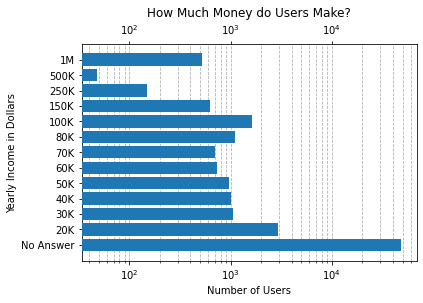

In [13]:
plt.barh(range(len(incsp)), inc_valsp, zorder=3)
plt.yticks(range(len(incsp)), labels=incs_labels)
plt.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
plt.grid(True, zorder=0, which='both', axis='x', linestyle='--')
plt.xscale('log')
plt.title('How Much Money do Users Make?')
plt.xlabel('Number of Users')
plt.ylabel('Yearly Income in Dollars')

In [14]:
religion_df = df.religion.value_counts()
rels = religion_df.index.values.tolist()
relsp = dict()
for rel in rels:
    x = rel.split()
    if x[0] in relsp: relsp[x[0]] += religion_df[rel]
    else: relsp[x[0]] = religion_df[rel]
rev_dict = {v:k for (k,v) in relsp.items()}
relspp, num_rels = [], []
for i in sorted(rev_dict):
    num_rels.append(i)
    relspp.append(rev_dict[i])
# print(relspp, num_rels)

Text(0, 0.5, 'Religious Identities')

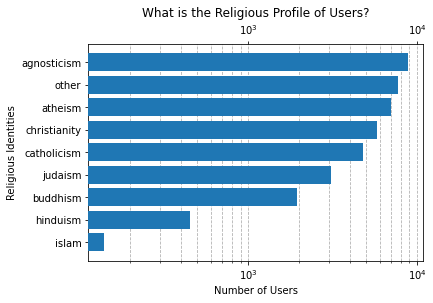

In [15]:
plt.barh(range(len(relspp)), num_rels, zorder=3)
plt.yticks(range(len(relspp)), labels=relspp)
plt.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
plt.grid(True, zorder=0, which='both', axis='x', linestyle='--')
plt.xscale('log')
plt.title('What is the Religious Profile of Users?')
plt.xlabel('Number of Users')
plt.ylabel('Religious Identities')

In [27]:
loc_df = pd.DataFrame(df.location.value_counts()).reset_index()
loc_df['state'] = loc_df.apply(lambda row: row.index, axis=1)
# locs = loc_df.index.values.tolist()
# locsp = dict()
# for loc in locs:
#     x = loc.split(',')
#     loci = x[-1].strip(' ').title()
#     if loci in locsp: 
#         locsp[loci] += loc_df.location[loc]
#     else: locsp[loci] = loc_df.location[loc]
# loc_dfp = pd.DataFrame(locsp)

In [29]:
loc_df.head()

,index,location,state
0,"san francisco, california",31064,"Index(['index', 'location'], dtype='object')"
1,"oakland, california",7214,"Index(['index', 'location'], dtype='object')"
2,"berkeley, california",4212,"Index(['index', 'location'], dtype='object')"
3,"san mateo, california",1331,"Index(['index', 'location'], dtype='object')"
4,"palo alto, california",1064,"Index(['index', 'location'], dtype='object')"


In [18]:
states_list = ['Alaska',
 'Alabama',
 'Arkansas',
 'Arizona',
 'California',
 'Colorado',
 'Connecticut',
 'District of Columbia',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Iowa',
 'Idaho',
 'Illinois',
 'Indiana',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Massachusetts',
 'Maryland',
 'Maine',
 'Michigan',
 'Minnesota',
 'Missouri',
 'Mississippi',
 'Montana',
 'North Carolina',
 'North Dakota',
 'Nebraska',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'Nevada',
 'New York',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Virginia',
 'Vermont',
 'Washington',
 'Wisconsin',
 'West Virginia',
 'Wyoming']

In [19]:
len(states_list)

51

In [20]:
#locspp = [loc.strip(' ').title() for loc in list(locsp.keys())]